Build a regression model.

In [8]:
# imports
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
full_df = pd.read_csv('C:/Users/Valerie/OneDrive/StatisticalModellingProject/Notebooks/bike_stations_barcelona.csv', index_col=0)

In [10]:
full_df.head()

,free_bikes,id,latitude,longitude,name
empty_slots,,,,,
23,7,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13"
3,22,5c10c2dba1c5a8e8d9dcbb251fd8eab7,41.430000,2.190246,"RAMBLA DE L'ONZE DE SETEMBRE, 69"
11,13,f1aaf083aaa04498aad975bc45bdc089,41.443365,2.190630,"PG. TORRAS I BAGES, 129"
8,9,4a30020e6926a2ba39f88be0f6bba5cb,41.377532,2.170732,"C/ SANT OLEGUER, 2"
15,11,e964297fbcd2fc96bb6632e5a530d0df,41.375116,2.152309,"AV. PARAL.LEL, 194"


In [26]:
full_df['id'] = pd.to_numeric(full_df['id'], errors='coerce')


In [29]:
grouped_by_station = full_df[['free_bikes', 'id', 'latitude', 'longitude', 'name']].groupby(by='name').mean()

grouped_by_station.head()

,free_bikes,id,latitude,longitude
name,,,,
"270 - CRTA. DE RIBES, 77 (TRINITAT VELLA)",9.0,NaN,41.448633,2.189837
"AV. CAN MARCET, 36",14.0,NaN,41.434786,2.147904
"AV. D'EDUARD MARISTANY, 1 /FORUM",18.0,NaN,41.410976,2.219372
"AV. DE LA CATEDRAL, 6",16.0,NaN,41.385062,2.176683
"AV. DIAGONAL, 612",7.0,NaN,41.392567,2.142217


In [30]:
grouped_by_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 270 - CRTA. DE RIBES, 77 (TRINITAT VELLA) to WORLD TRADE CENTER
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   free_bikes  504 non-null    float64
 1   id          0 non-null      float64
 2   latitude    504 non-null    float64
 3   longitude   504 non-null    float64
dtypes: float64(4)
memory usage: 19.7+ KB


In [36]:
print(grouped_by_station.columns)

Index(['free_bikes', 'id', 'latitude', 'longitude'], dtype='object')


In [37]:
# filling with 0 the two bike stations without any poi
grouped_by_station[['id', 'free_bikes']] = grouped_by_station[['id', 'free_bikes']].fillna(0)

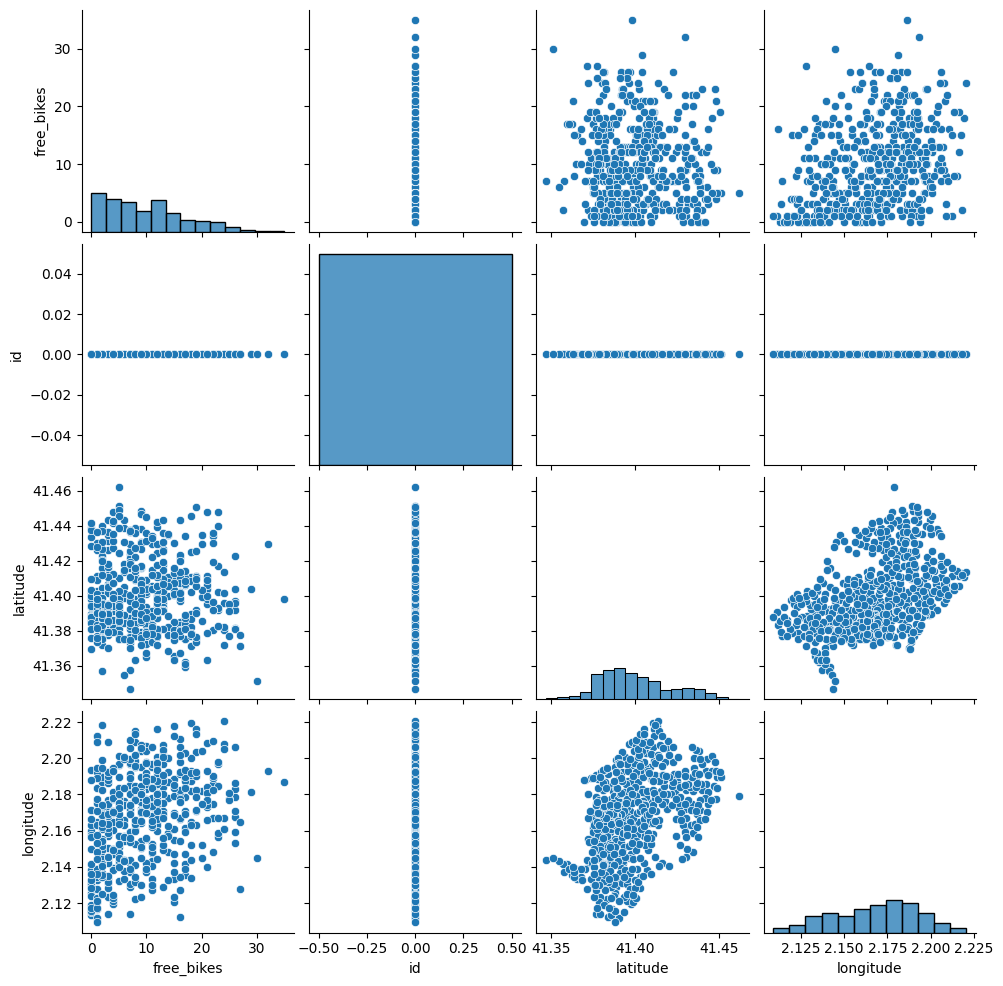

In [38]:
sns.pairplot(data=grouped_by_station)
plt.show()

In [41]:
y = grouped_by_station['free_bikes']
X = grouped_by_station[['latitude', 'longitude', 'id']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

,const,latitude,longitude,id
name,,,,
"270 - CRTA. DE RIBES, 77 (TRINITAT VELLA)",1.0,41.448633,2.189837,0.0
"AV. CAN MARCET, 36",1.0,41.434786,2.147904,0.0
"AV. D'EDUARD MARISTANY, 1 /FORUM",1.0,41.410976,2.219372,0.0
"AV. DE LA CATEDRAL, 6",1.0,41.385062,2.176683,0.0
"AV. DIAGONAL, 612",1.0,41.392567,2.142217,0.0


Provide model output and an interpretation of the results. 

In [42]:
model=sm.OLS(y, X) # Instantiate
results = model.fit() # fit the model 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     35.68
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           3.27e-15
Time:                        18:46:29   Log-Likelihood:                -1669.6
No. Observations:                 504   AIC:                             3345.
Df Residuals:                     501   BIC:                             3358.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2444.1763    632.849      3.862      0.0

c:\Users\Valerie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In summary, the model shows that the R-squared is 0.125, indicating that the model explains 12.5% of variance in "free_bikes". As for the P-value, the model shows that the model is statistically significant because the value is 0.00. However, there are warnings about potential issues, such as the 'id' variable causing a divide by zero problem and the possibility of multicollinearity. Further investigation and possible model adjustments would need to be performed for a better model. 

# Stretch

How can you turn the regression model into a classification model?